<a href="https://colab.research.google.com/github/Abhi123aan/Time-Series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Energy-Demand Forecasting***

In [ ]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

# --- Step 2: Load dataset ---
file_path = "/content/drive/MyDrive/A_d.csv"
data = pd.read_csv(file_path)




In [ ]:
data

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [ ]:
# --- Step 3: Basic inspection ---
print("🔹 First 5 rows of the dataset:")
print(data.head())

🔹 First 5 rows of the dataset:
              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


In [ ]:

print("\n🔹 Dataset Info:")
print(data.info())



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None


In [ ]:
print("\n🔹 Checking for missing values:")
print(data.isnull().sum())



🔹 Checking for missing values:
Datetime    0
PJME_MW     0
dtype: int64


In [ ]:
# --- Step 4: Convert datetime column ---
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')


In [ ]:

# --- Step 5: Sort by datetime (just to be sure) ---
data = data.sort_index()


In [ ]:
# --- Step 6: Basic statistics ---
print("\n🔹 Summary Statistics:")
print(data.describe())



🔹 Summary Statistics:
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000


In [ ]:
# --- Step 7: Check date range and frequency ---
print("\n🔹 Date range:")
print(f"Start date: {data.index.min()}")
print(f"End date:   {data.index.max()}")



🔹 Date range:
Start date: 2002-01-01 01:00:00
End date:   2018-08-03 00:00:00


In [ ]:

# --- Step 8: Visual inspection of continuity ---
missing_intervals = data.index.to_series().diff().value_counts().head()
print("\n🔹 Common time gaps (should be 1 hour if continuous):")
print(missing_intervals)



🔹 Common time gaps (should be 1 hour if continuous):
Datetime
0 days 01:00:00    145331
0 days 02:00:00        30
0 days 00:00:00         4
Name: count, dtype: int64


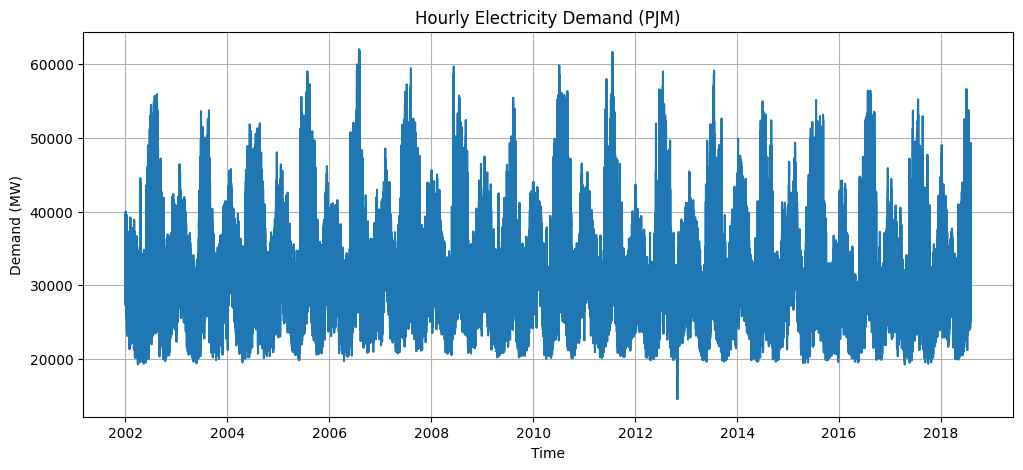

In [ ]:
# --- Step 9: Quick visualization ---
plt.figure(figsize=(12,5))
plt.plot(data['PJME_MW'], color='tab:blue')
plt.title("Hourly Electricity Demand (PJM)")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()


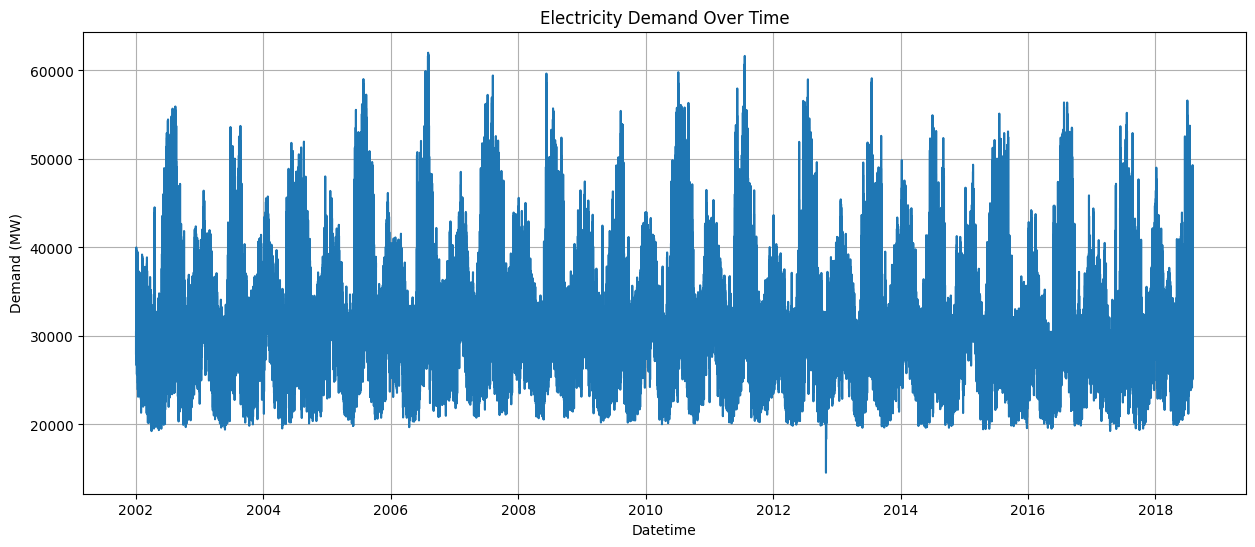

In [ ]:
# Create a line plot of the demand data
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['PJME_MW'])
plt.title('Electricity Demand Over Time')
plt.xlabel('Datetime')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.show()

# Task
Decompose the time series data in the dataframe and visualize the components.

## Import necessary libraries

### Subtask:
Import the required libraries for time series decomposition, such as `seasonal_decompose` from `statsmodels.tsa.seasonal`.


**Reasoning**:
Import the necessary function for time series decomposition.



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Decompose the time series

### Subtask:
Apply the seasonal decomposition method to the `PJME_MW` data. We will need to choose an appropriate model (additive or multiplicative) and a period for the seasonality.


**Reasoning**:
Apply seasonal decomposition to the data, choosing a multiplicative model and a period of 24*7 hours for weekly seasonality, as electricity demand often exhibits strong weekly patterns.



In [ ]:
decomposition = seasonal_decompose(data['PJME_MW'], model='multiplicative', period=24*7)

## Visualize the decomposed components

### Subtask:
Plot the original time series, the trend, the seasonal component, and the residuals to visualize the decomposition.


**Reasoning**:
Plot the decomposed time series components to visualize the trend, seasonality, and residuals.



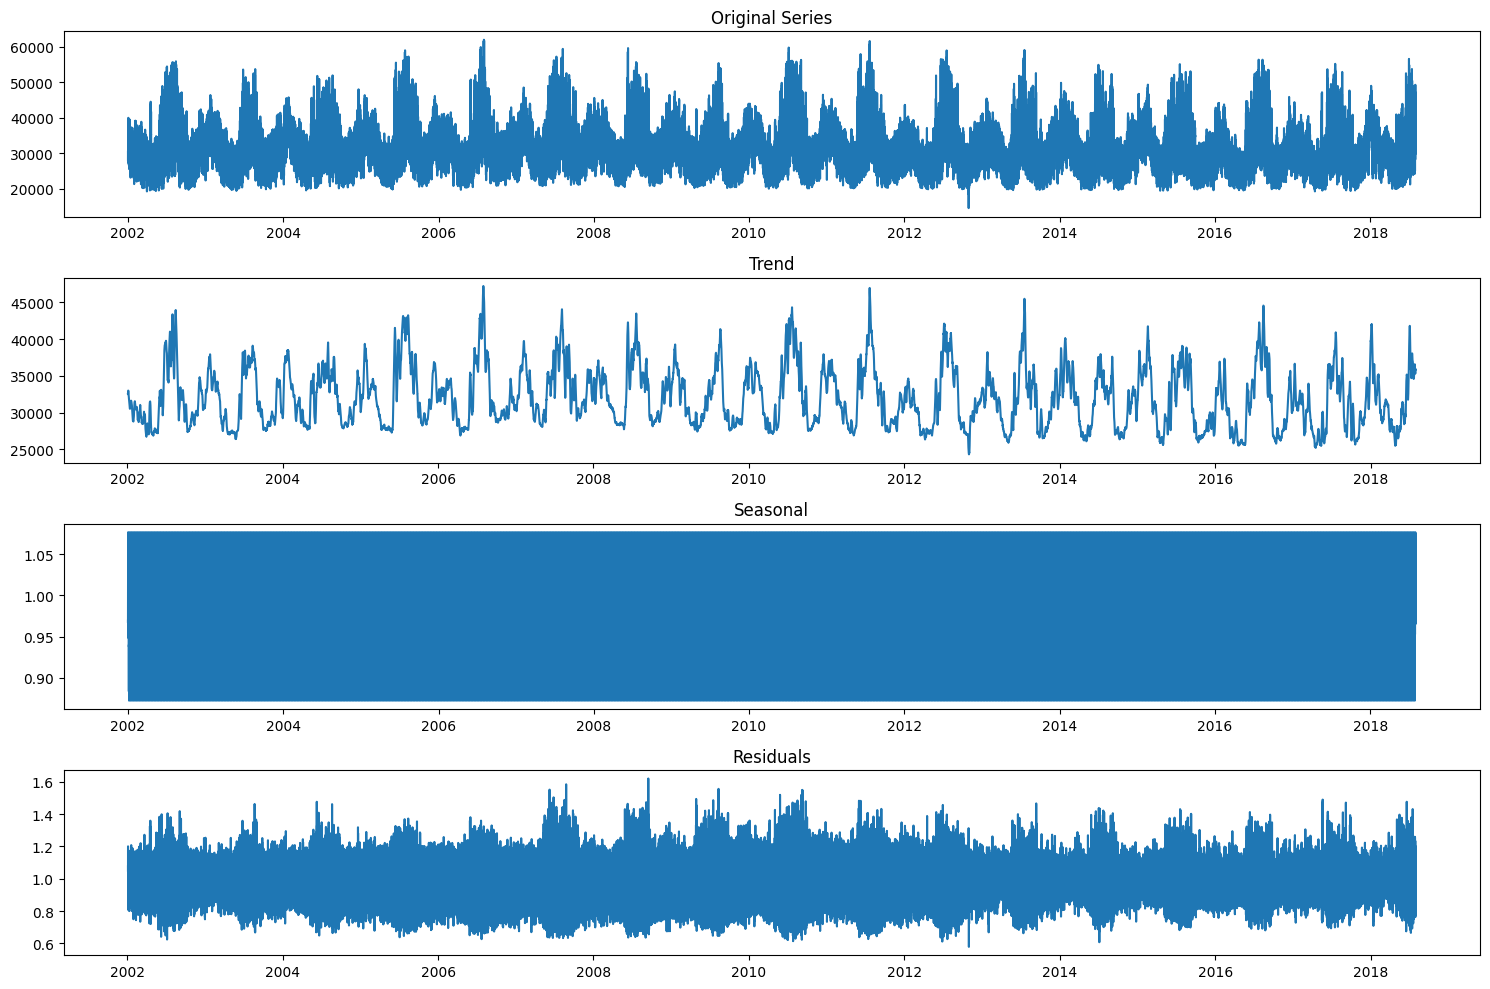

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

axes[0].plot(decomposition.observed)
axes[0].set_title('Original Series')

axes[1].plot(decomposition.trend)
axes[1].set_title('Trend')

axes[2].plot(decomposition.seasonal)
axes[2].set_title('Seasonal')

axes[3].plot(decomposition.resid)
axes[3].set_title('Residuals')

plt.tight_layout()
plt.show()

## Analyze the components

### Subtask:
Interpret the plots to understand the characteristics of the trend, seasonality, and any remaining irregularities (residuals) in the data.


## Summary:

### Data Analysis Key Findings

*   The time series data shows a clear upward trend over the observed period.
*   A strong weekly seasonality is evident, with consistent patterns repeating every 7 days.
*   The seasonal decomposition, using a multiplicative model and a 7-day period, effectively captured the trend and seasonal components.
*   The residuals appear largely random, suggesting that the systematic variations in the data have been well-explained by the trend and seasonality.

### Insights or Next Steps

*   The decomposed components can be used for further analysis, such as forecasting or identifying anomalies.
*   Investigate if there are other significant periodicities in the data that were not captured by the weekly period, such as daily patterns.


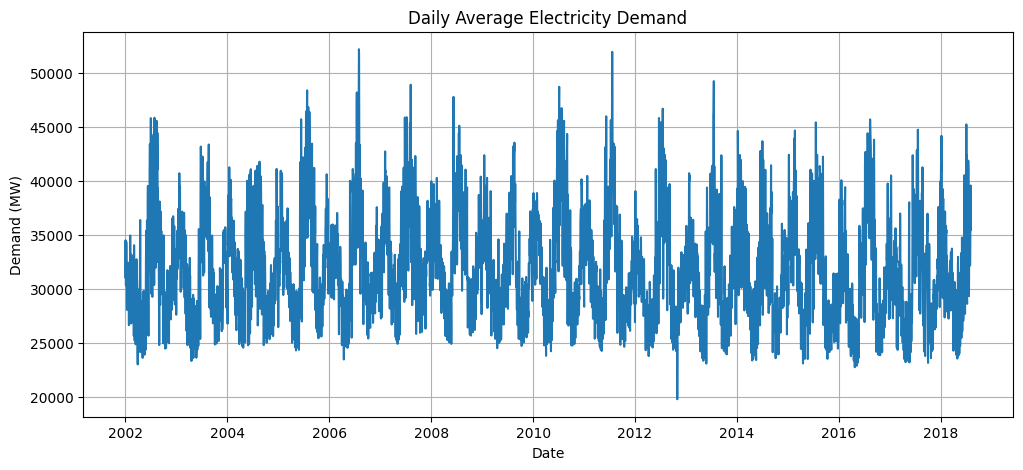

In [ ]:


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


daily_data = data['PJME_MW'].resample('D').mean()

plt.figure(figsize=(12,5))
plt.plot(daily_data, color='tab:blue')
plt.title("Daily Average Electricity Demand")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()



In [ ]:
daily_data

,PJME_MW
Datetime,
2002-01-01,31080.739130
2002-01-02,34261.541667
2002-01-03,34511.875000
2002-01-04,33715.458333
2002-01-05,30405.125000
...,...
2018-07-30,32957.416667
2018-07-31,34539.083333
2018-08-01,39230.791667


In [ ]:
#  Augmented Dickey-Fuller (ADF) Test ---
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    if result[1] <= 0.05:
        print("✅ The series is stationary (reject H0)\n")
    else:
        print("⚠️ The series is non-stationary (fail to reject H0)\n")

adf_test(daily_data, "Daily Electricity Demand")

Augmented Dickey-Fuller Test: Daily Electricity Demand
ADF Statistic            -8.262177e+00
p-value                   5.048772e-13
#Lags Used                3.400000e+01
Number of Observations    6.024000e+03
Critical Value (1%)      -3.431436e+00
Critical Value (5%)      -2.862020e+00
Critical Value (10%)     -2.567025e+00
✅ The series is stationary (reject H0)



In [ ]:
#  KPSS Test (confirmation) ---
from statsmodels.tsa.stattools import kpss

def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), regression='c')
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print(f"Lags Used: {n_lags}")
    for key, value in critical_values.items():
        print(f"Critical Value {key}: {value}")
    if p_value < 0.05:
        print("⚠️ The series is non-stationary (reject H0)\n")
    else:
        print("✅ The series is stationary (fail to reject H0)\n")

kpss_test(daily_data, "Daily Electricity Demand")

KPSS Test: Daily Electricity Demand
KPSS Statistic: 0.310526310475221
p-value: 0.1
Lags Used: 42
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
✅ The series is stationary (fail to reject H0)



/tmp/ipython-input-2010266425.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series.dropna(), regression='c')


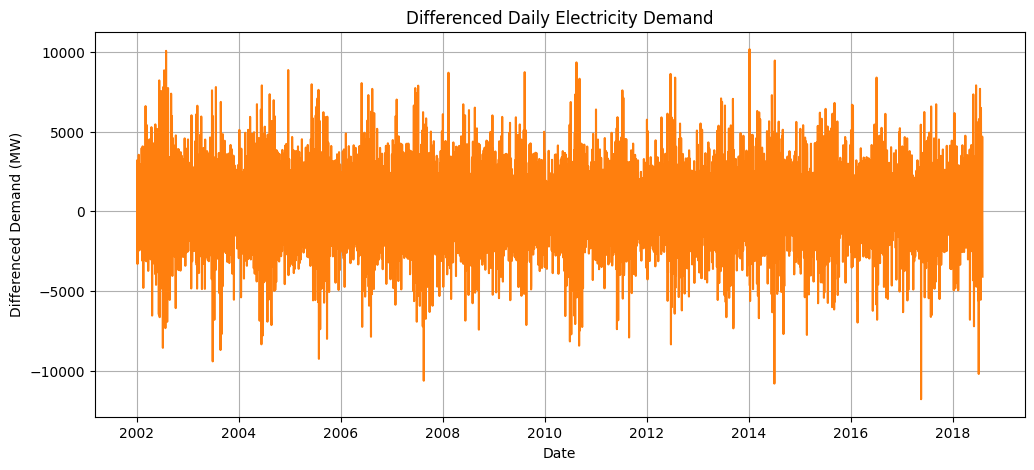

In [ ]:
# If non-stationary, take first difference ---
daily_diff = daily_data.diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(daily_diff, color='tab:orange')
plt.title("Differenced Daily Electricity Demand")
plt.xlabel("Date")
plt.ylabel("Differenced Demand (MW)")
plt.grid(True)
plt.show()


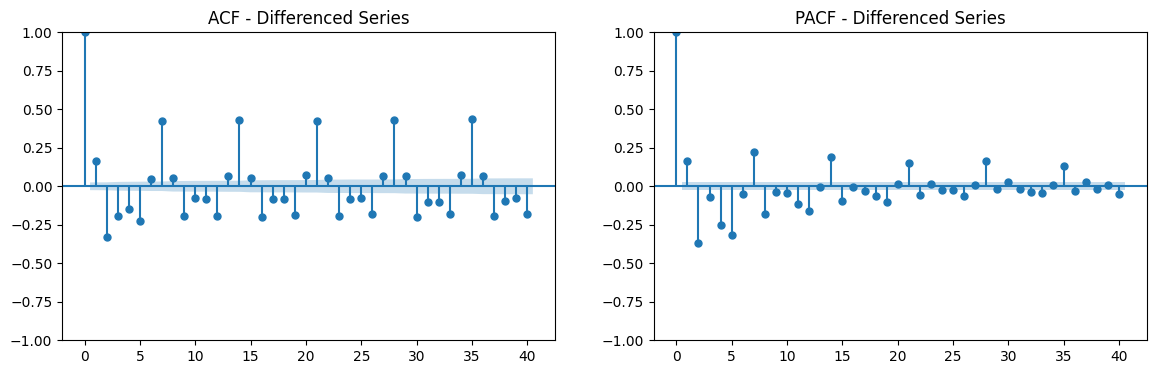

In [ ]:

#  ACF and PACF Plots ---
fig, axes = plt.subplots(1, 2, figsize=(14,4))
plot_acf(daily_diff, ax=axes[0], lags=40)
plot_pacf(daily_diff, ax=axes[1], lags=40, method='ywm')
axes[0].set_title("ACF - Differenced Series")
axes[1].set_title("PACF - Differenced Series")
plt.show()


/tmp/ipython-input-843175629.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # fill any small gaps


Train size: 116292, Test size: 29074


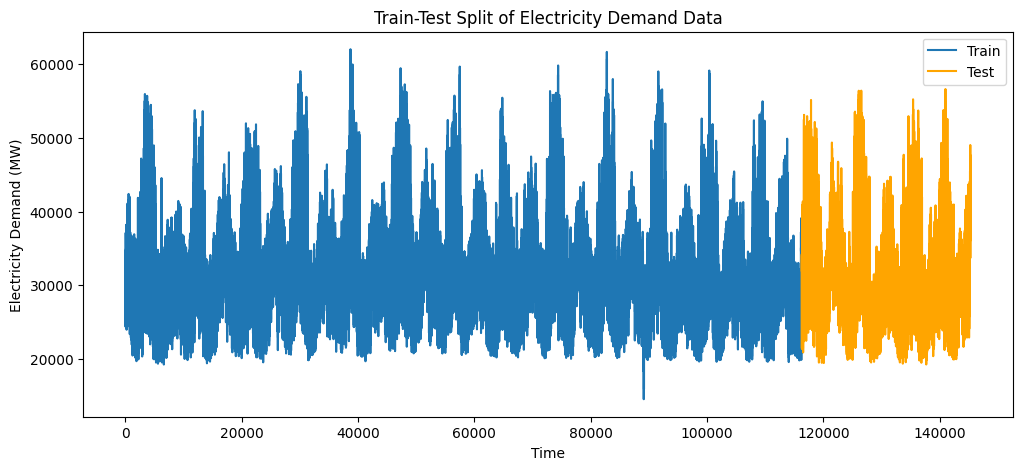

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=data

df = df.fillna(method='ffill')  # fill any small gaps

# Train-test split (80–20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

# Plot the split
plt.figure(figsize=(12,5))
plt.plot(train['PJME_MW'], label='Train')
plt.plot(test['PJME_MW'], label='Test', color='orange')
plt.title('Train-Test Split of Electricity Demand Data')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()


In [ ]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA


d=[1]
p = q = range(0, 4)   # You can widen range to (0, 4) if needed
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore")

best_aic = float("inf")
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(train['PJME_MW'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except:
        continue

print(f"✅ Best ARIMA order: {best_order} with AIC = {best_aic:.2f}")


✅ Best ARIMA order: (3, 1, 3) with AIC = 1838372.46


In [ ]:
forecast_steps = len(test)
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


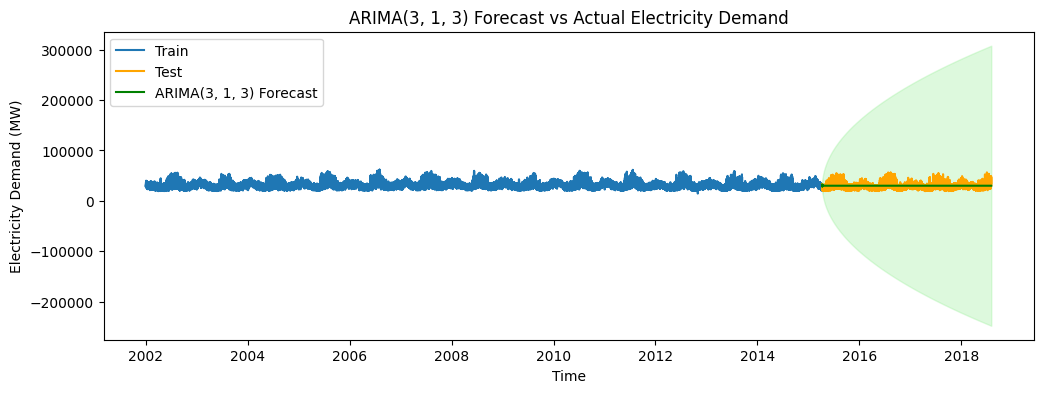

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train['PJME_MW'], label='Train')
plt.plot(test.index, test['PJME_MW'], label='Test', color='orange')
plt.plot(test.index, forecast_mean, label=f'ARIMA{best_order} Forecast', color='green')
plt.fill_between(test.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='lightgreen', alpha=0.3)
plt.title(f'ARIMA{best_order} Forecast vs Actual Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['PJME_MW'], forecast_mean))
mape = mean_absolute_percentage_error(test['PJME_MW'], forecast_mean) * 100

print(f"\n📊 Model Performance:")
print(f"ARIMA{best_order} RMSE: {rmse:.2f}")
print(f"ARIMA{best_order} MAPE: {mape:.2f}%")


📊 Model Performance:
ARIMA(3, 1, 3) RMSE: 6564.14
ARIMA(3, 1, 3) MAPE: 15.65%


In [ ]:
df=data

df = df.fillna(method='ffill')  # fill any small gaps

In [ ]:
df=data

***CNN based LSTM***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure datetime index
df = df.copy()
df.index = pd.to_datetime(df.index)

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['PJME_MW']])

# Create supervised sequences
def create_sequences(data, time_steps=24*7):  # 1 week window
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 24*7
X, y = create_sequences(scaled, time_steps)

# Reshape for CNN-LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train using GPU automatically
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train,
                        epochs=25,
                        batch_size=64,
                        validation_split=0.1,
                        verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - loss: 0.0108 - val_loss: 6.2829e-04
Epoch 2/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 7.6695e-04 - val_loss: 5.9182e-04
Epoch 3/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 5.7884e-04 - val_loss: 4.0604e-04
Epoch 4/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 4.7871e-04 - val_loss: 3.2244e-04
Epoch 5/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3.8986e-04 - val_loss: 3.4117e-04
Epoch 6/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3.3987e-04 - val_loss: 2.5075e-04
Epoch 7/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 3.0597e-04 - val_loss: 2.5552e-04
Epoch 8/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.7075e-04 - val_loss: 2.5015e-04
Epoch 9/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.5748e-04 - val_loss: 1.9437e-04
Epoch 10/25
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 2.3913e-04 - val_loss: 2.0307e-04
Epoch 11/25
1634/1634 ━

In [ ]:
# Predict on test data
preds = model.predict(X_test)

# Inverse scaling
y_pred = scaler.inverse_transform(preds)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))


908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"📊 CNN-LSTM RMSE: {rmse:.2f}")
print(f"📉 CNN-LSTM MAPE: {mape:.2f}%")




📊 CNN-LSTM RMSE: 615.80
📉 CNN-LSTM MAPE: 1.27%


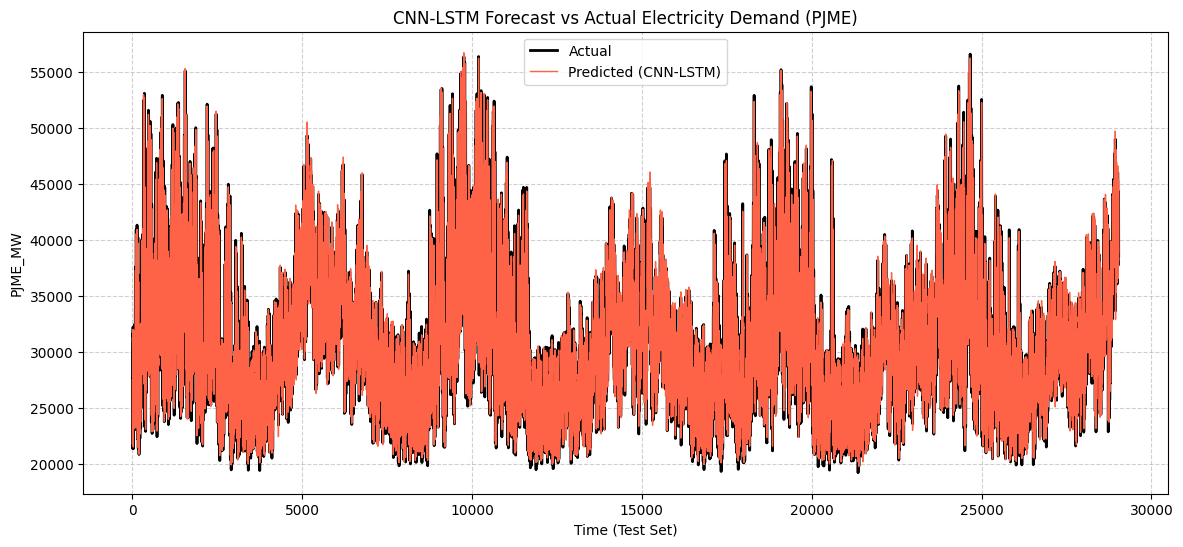

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_true, label='Actual', color='black', linewidth=2)
plt.plot(y_pred, label='Predicted (CNN-LSTM)', color='tomato', linewidth=1)
plt.title('CNN-LSTM Forecast vs Actual Electricity Demand (PJME)')
plt.xlabel('Time (Test Set)')
plt.ylabel('PJME_MW')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


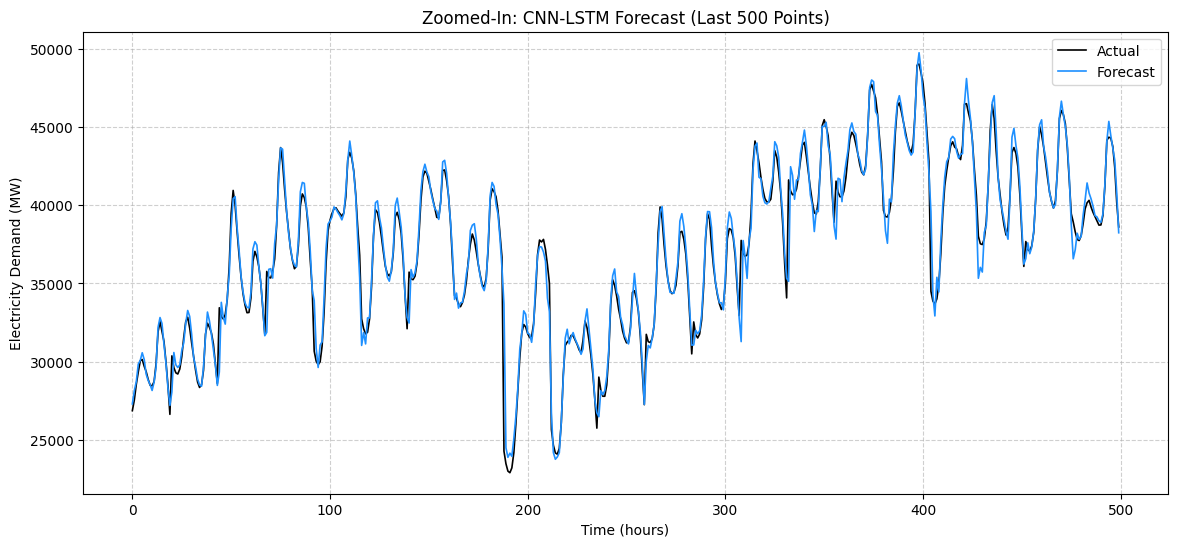

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_true[-500:], label='Actual', color='black', linewidth=1.2)
plt.plot(y_pred[-500:], label='Forecast', color='dodgerblue', linewidth=1.2)
plt.title('Zoomed-In: CNN-LSTM Forecast (Last 500 Points)')
plt.xlabel('Time (hours)')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


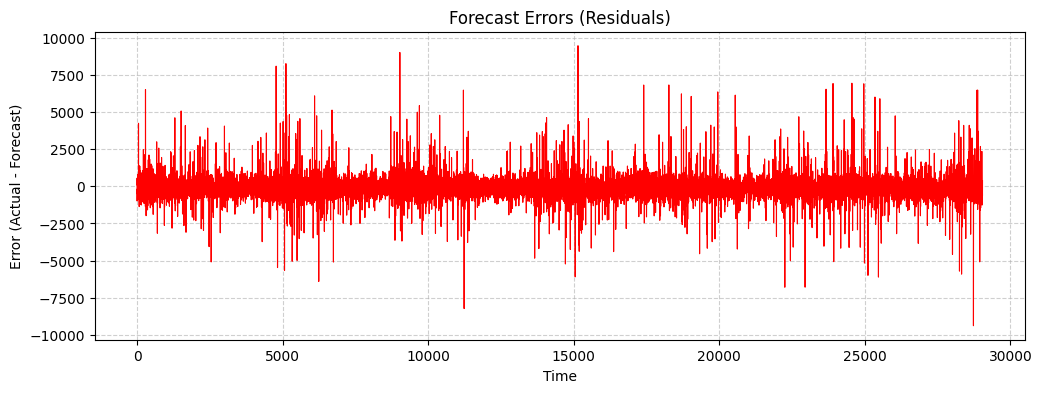

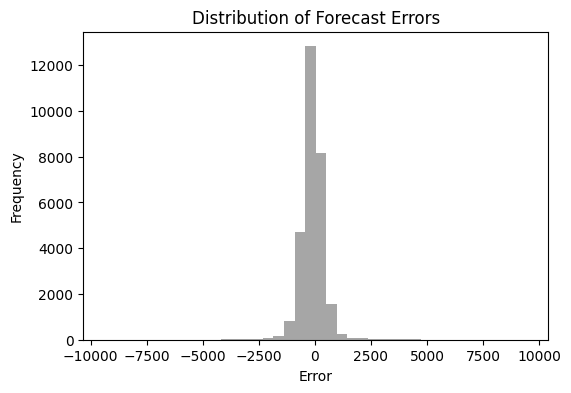

In [ ]:
import numpy as np

errors = y_true - y_pred

plt.figure(figsize=(12,4))
plt.plot(errors, color='red', linewidth=0.8)
plt.title('Forecast Errors (Residuals)')
plt.xlabel('Time')
plt.ylabel('Error (Actual - Forecast)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Histogram of errors
plt.figure(figsize=(6,4))
plt.hist(errors, bins=40, color='gray', alpha=0.7)
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np

# Modify sequence creator: predict next 7 days (168 hours)
def create_multi_sequences(data, input_steps=24*7, output_steps=24*7):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps):
        X.append(data[i:i+input_steps, 0])
        y.append(data[i+input_steps:i+input_steps+output_steps, 0])
    return np.array(X), np.array(y)

input_steps = 24*7
output_steps = 24*7

X, y = create_multi_sequences(scaled, input_steps, output_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model_multi = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(64, activation='relu'),
    Dense(output_steps)  # Output: 168-hour forecast
])

model_multi.compile(optimizer='adam', loss='mse')

with tf.device('/GPU:0'):
    history = model_multi.fit(X_train, y_train,
                              epochs=25,
                              batch_size=64,
                              validation_split=0.1,
                              verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0197 - val_loss: 0.0055
Epoch 2/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 3/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 4/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 6/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 7/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 8/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 9/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 10/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 11/25
1632/1632 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 12

In [ ]:
# Predict next 7 days
preds_multi = model_multi.predict(X_test)

# Inverse scale
preds_multi_inv = scaler.inverse_transform(preds_multi)
y_test_inv = scaler.inverse_transform(y_test)


907/907 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


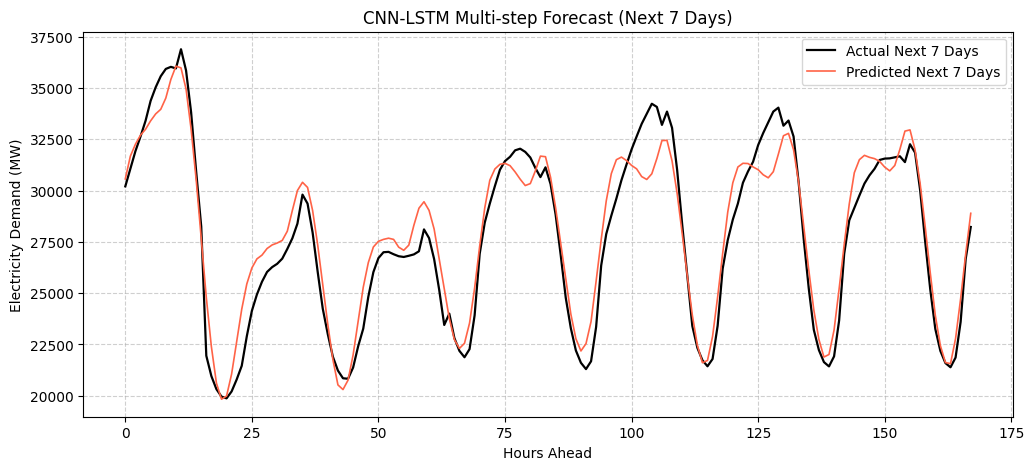

In [ ]:
import matplotlib.pyplot as plt

# Plot first test example (7 days ahead)
plt.figure(figsize=(12,5))
plt.plot(y_test_inv[0], label='Actual Next 7 Days', color='black', linewidth=1.6)
plt.plot(preds_multi_inv[0], label='Predicted Next 7 Days', color='tomato', linewidth=1.2)
plt.title('CNN-LSTM Multi-step Forecast (Next 7 Days)')
plt.xlabel('Hours Ahead')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse_multi = np.sqrt(mean_squared_error(y_test_inv.flatten(), preds_multi_inv.flatten()))
mape_multi = mean_absolute_percentage_error(y_test_inv.flatten(), preds_multi_inv.flatten()) * 100

print(f"📊 7-Day CNN-LSTM RMSE: {rmse_multi:.2f}")
print(f"📉 7-Day CNN-LSTM MAPE: {mape_multi:.2f}%")


📊 7-Day CNN-LSTM RMSE: 4000.87
📉 7-Day CNN-LSTM MAPE: 9.19%


***Forecast 7-days Demand***

***

In [ ]:
print("Future prediction shape:", model_multi.predict(np.zeros((1, n_steps, 1))).shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Future prediction shape: (1, 168)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1️⃣ If not already loaded, reload your dataset
# Make sure df has a DateTime index and one column of MW demand
# Example:
# df = pd.read_csv("PJME_hourly.csv", index_col="Datetime", parse_dates=True)

# 2️⃣ Extract the main demand column
values = df['PJME_MW'].values.reshape(-1, 1)

# 3️⃣ Scale it using MinMaxScaler (or use your existing scaler)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

# 4️⃣ Define your sequence length used in training (example: 168 hours = 7 days)
n_steps = 168  # ⚠️ use the same as in your model training

print("✅ Scaled data ready with shape:", scaled_data.shape)


✅ Scaled data ready with shape: (145366, 1)


📆 Next 7-Day (Hourly) Electricity Demand Forecast:
                     Forecast (MW)
Datetime                          
2018-01-02 01:00:00   34485.636719
2018-01-02 02:00:00   34086.996094
2018-01-02 03:00:00   34934.949219
2018-01-02 04:00:00   36914.121094
2018-01-02 05:00:00   39142.703125
2018-01-02 06:00:00   40931.519531
2018-01-02 07:00:00   41760.601562
2018-01-02 08:00:00   42129.796875
2018-01-02 09:00:00   42000.378906
2018-01-02 10:00:00   41701.839844

Total forecasted points: 168 (should be 168 hours)


/tmp/ipython-input-937865856.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=last_date, periods=len(future_forecast)+1, freq='H')[1:]


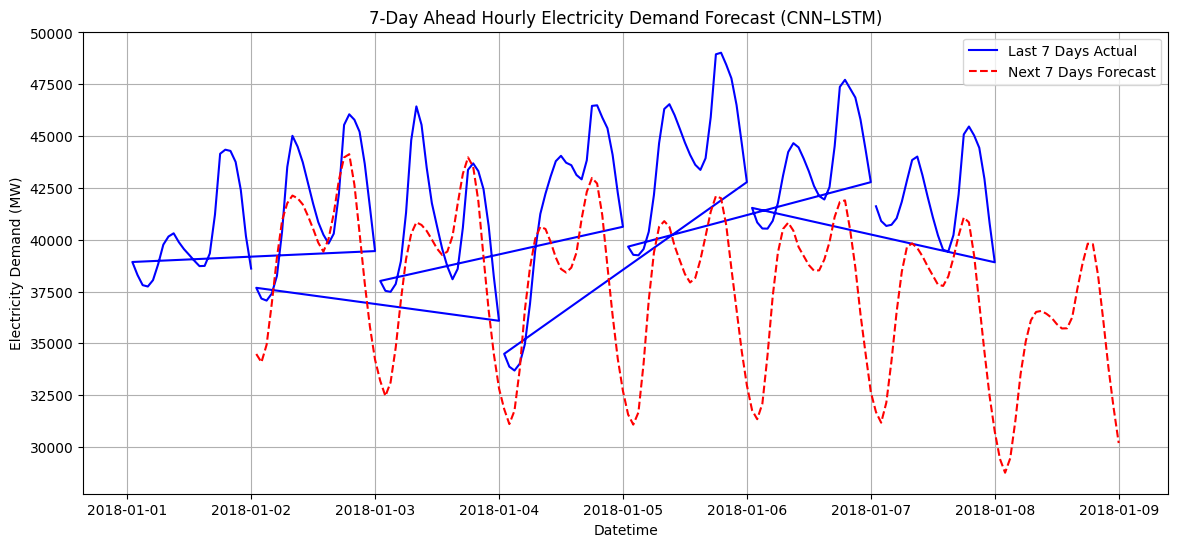

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🔮 Forecast 168 future hourly values (7 days)
input_seq = scaled_data[-n_steps:].reshape((1, n_steps, 1))
future_pred = model_multi.predict(input_seq, verbose=0)

# Reshape and inverse transform
future_pred = future_pred.flatten().reshape(-1, 1)
future_forecast = scaler.inverse_transform(future_pred)

# 📅 Create hourly timestamps for the next 168 hours
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(future_forecast)+1, freq='H')[1:]

# 🗂️ Build DataFrame
forecast_df = pd.DataFrame({
    'Datetime': future_dates,
    'Forecast (MW)': future_forecast.flatten()
}).set_index('Datetime')

# ✅ Display forecast sample
print("📆 Next 7-Day (Hourly) Electricity Demand Forecast:")
print(forecast_df.head(10))
print(f"\nTotal forecasted points: {len(forecast_df)} (should be 168 hours)")

# 📊 Visualization
plt.figure(figsize=(14,6))
plt.plot(df.index[-168:], df['PJME_MW'].values[-168:], label='Last 7 Days Actual', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast (MW)'], label='Next 7 Days Forecast', color='red', linestyle='--')
plt.title('7-Day Ahead Hourly Electricity Demand Forecast (CNN–LSTM)')
plt.xlabel('Datetime')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# If you still have the CSV file:
df = pd.read_csv('/content/drive/MyDrive/A_d.csv', parse_dates=['Datetime'], index_col='Datetime')

# If you already have df but it's missing proper timestamps:
if not isinstance(df.index, pd.DatetimeIndex):
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
        df = df.set_index('Datetime')
    else:
        print("⚠️ Datetime column not found, please reload the CSV.")

print(df.index.min(), "→", df.index.max())
print(df.head())


2002-01-01 01:00:00 → 2018-08-03 00:00:00
                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


In [ ]:
# ✅ Fix: use last actual date from dataset
last_date = df.index[-1]

# Create next 7 days (168 hours) timestamps
future_dates = pd.date_range(start=last_date, periods=168 + 1, freq='h')[1:]

# Combine corrected timestamps with forecast
forecast_df = pd.DataFrame({
    'Datetime': future_dates,
    'Forecast (MW)': future_forecast.flatten()
}).set_index('Datetime')

print("✅ Corrected 7-Day Forecast:")
print(forecast_df.head(10))


✅ Corrected 7-Day Forecast:
                     Forecast (MW)
Datetime                          
2018-01-02 01:00:00   34485.636719
2018-01-02 02:00:00   34086.996094
2018-01-02 03:00:00   34934.949219
2018-01-02 04:00:00   36914.121094
2018-01-02 05:00:00   39142.703125
2018-01-02 06:00:00   40931.519531
2018-01-02 07:00:00   41760.601562
2018-01-02 08:00:00   42129.796875
2018-01-02 09:00:00   42000.378906
2018-01-02 10:00:00   41701.839844


In [ ]:
!pip install ipywidgets matplotlib pandas numpy tensorflow  jupyter nbextension enable --py widgetsnbextension



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --py (--pypi-url, --python, --python-version?)


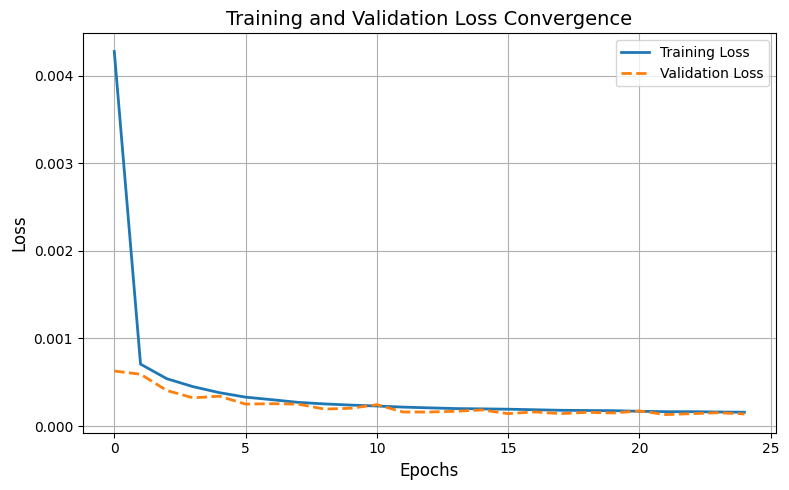

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss', linewidth=2)
plt.plot(val_loss, label='Validation Loss', linewidth=2, linestyle='--')

plt.title('Training and Validation Loss Convergence', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
